In [10]:
import pandas as pd

df = pd.read_csv('/Users/sosiska_killer/Documents/DS_Children/school_canteen_data.csv')
df

,student_id,age,grade,day,main_dish,price,bought_dessert
0,1,16,10,Monday,pasta,147,0
1,2,12,6,Monday,salad,115,1
2,3,11,5,Monday,pasta,143,1
3,4,15,9,Monday,salad,122,0
4,5,16,10,Friday,pizza,174,1
...,...,...,...,...,...,...,...
295,296,15,9,Thursday,salad,115,1
296,297,13,7,Wednesday,burger,201,0
297,298,11,5,Friday,pasta,163,1
298,299,13,7,Wednesday,burger,195,0


Столовая хочет:

1 Знать, какие блюда самые популярные - (salad - 71, pasta - 58, pizza - 58)

2 Предсказывать, купит ли ученик десерт - модель обученна ученик купит

3 Понять, влияет ли цена и день недели на покупку

In [11]:
df['main_dish'].value_counts()

main_dish
salad     71
pasta     58
pizza     58
burger    58
soup      55
Name: count, dtype: int64

In [12]:
df

,student_id,age,grade,day,main_dish,price,bought_dessert
0,1,16,10,Monday,pasta,147,0
1,2,12,6,Monday,salad,115,1
2,3,11,5,Monday,pasta,143,1
3,4,15,9,Monday,salad,122,0
4,5,16,10,Friday,pizza,174,1
...,...,...,...,...,...,...,...
295,296,15,9,Thursday,salad,115,1
296,297,13,7,Wednesday,burger,201,0
297,298,11,5,Friday,pasta,163,1
298,299,13,7,Wednesday,burger,195,0


In [14]:
X = df.drop(columns=['bought_dessert'])
y = df['bought_dessert']

X = X.drop(columns=['student_id'])

X_encoded = pd.get_dummies(X)
X_encoded



,age,grade,price,day_Friday,day_Monday,day_Thursday,day_Tuesday,day_Wednesday,main_dish_burger,main_dish_pasta,main_dish_pizza,main_dish_salad,main_dish_soup
0,16,10,147,False,True,False,False,False,False,True,False,False,False
1,12,6,115,False,True,False,False,False,False,False,False,True,False
2,11,5,143,False,True,False,False,False,False,True,False,False,False
3,15,9,122,False,True,False,False,False,False,False,False,True,False
4,16,10,174,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,15,9,115,False,False,True,False,False,False,False,False,True,False
296,13,7,201,False,False,False,False,True,True,False,False,False,False
297,11,5,163,True,False,False,False,False,False,True,False,False,False
298,13,7,195,False,False,False,False,True,True,False,False,False,False


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/sosiska_killer/Documents/DS_Children/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.83


In [20]:
new_student = pd.DataFrame({
    'age': [10],
    'grade': [4],
    'main_dish': ['salad'],
    'day': ['Monday'],
    'price': [130]
})
new_student_encoded = pd.get_dummies(new_student)
new_student_encoded = new_student_encoded.reindex(columns=X_encoded.columns, fill_value=0)
new_student_encoded

prediction = model.predict(new_student_encoded)
print(f"Предсказание: {'купит' if prediction[0] == 1 else 'не купит'}")



Предсказание: купит


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [22]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Точность модели: {rf_accuracy:.2f}")

Точность модели: 0.90


In [23]:
print("LogisticRegression accuracy:", accuracy)
print("RandomForestClassifier accuracy:", rf_accuracy)


LogisticRegression accuracy: 0.8333333333333334
RandomForestClassifier accuracy: 0.9


In [24]:
feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X_encoded.columns
).sort_values(ascending=False)

feature_importances

price               0.393106
age                 0.132592
grade               0.117708
main_dish_burger    0.060041
day_Thursday        0.050811
day_Friday          0.049409
day_Wednesday       0.039582
day_Monday          0.036428
day_Tuesday         0.030139
main_dish_soup      0.028108
main_dish_salad     0.024200
main_dish_pasta     0.022070
main_dish_pizza     0.015807
dtype: float64

<Axes: title={'center': 'Что сильнее всего влияет на покупку десерта'}>

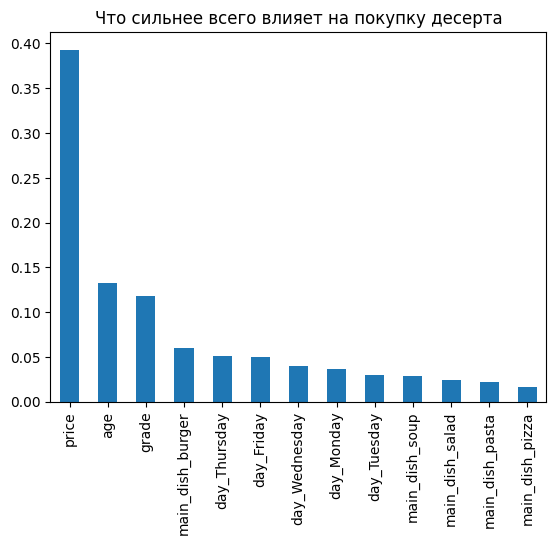

In [32]:
import matplotlib.pyplot as plt
feature_importances.plot(kind='bar', title='Что сильнее всего влияет на покупку десерта')


Что готовить завтра?  Что нужно приготовить столовой завтра что бы увеличить шанс покупки десерта

Гипотеза: Некторые блюда увеличивают шанс покупки десерта

In [35]:
df.groupby('main_dish')['bought_dessert'].mean().sort_values(ascending=False)

main_dish
soup      0.763636
salad     0.661972
pasta     0.568966
pizza     0.379310
burger    0.103448
Name: bought_dessert, dtype: float64

In [49]:
def simulate_dish(dish):
    exmple = pd.DataFrame({
        'day': ['Friday'],
        'main_dish': [dish],
        'price': [130]
    })
    encoded = pd.get_dummies(exmple)
    encoded = encoded.reindex(columns=X_encoded.columns, fill_value=0)
    prediction = rf_model.predict_proba(encoded)[0, 1]
    return prediction

for dish in df['main_dish'].unique():
    print(f"{dish}: {simulate_dish(dish):.2f}")


pasta: 0.98
salad: 0.99
pizza: 0.99
burger: 0.57
soup: 0.99


In [47]:
df['price'].value_counts()

price
130    10
148     9
195     7
166     7
129     6
       ..
177     1
194     1
153     1
215     1
187     1
Name: count, Length: 103, dtype: int64